In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Data

In [4]:
period = '5y'
aapl_stock = yf.Ticker("AAPL").history(period=period).reset_index()

aapl_stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-09-17 00:00:00-04:00,53.210755,53.418799,53.007547,53.389767,73274800,0.0,0.0
1,2019-09-18 00:00:00-04:00,53.476845,53.909868,53.084950,53.890514,101360000,0.0,0.0
2,2019-09-19 00:00:00-04:00,53.706667,54.130011,53.309933,53.452663,88242400,0.0,0.0
3,2019-09-20 00:00:00-04:00,53.554257,53.839710,52.608384,52.671280,221652400,0.0,0.0
4,2019-09-23 00:00:00-04:00,52.966420,53.181721,52.651935,52.910782,76662000,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2024-09-10 00:00:00-04:00,218.919998,221.479996,216.729996,220.110001,51591000,0.0,0.0
1254,2024-09-11 00:00:00-04:00,221.460007,223.089996,217.889999,222.660004,44587100,0.0,0.0
1255,2024-09-12 00:00:00-04:00,222.500000,223.550003,219.820007,222.770004,37498200,0.0,0.0
1256,2024-09-13 00:00:00-04:00,223.580002,224.039993,221.910004,222.500000,36766600,0.0,0.0


# TA

In [8]:
# https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html

from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import AverageTrueRange

sma_values = SMAIndicator(aapl_stock['Close'], window = 14, fillna=False).sma_indicator()
rsi_values = RSIIndicator(aapl_stock['Close'], window = 14, fillna=False).rsi()
atr_values = AverageTrueRange(aapl_stock['High'], aapl_stock['Low'], aapl_stock['Close'], window = 14, fillna=False).average_true_range()

In [11]:
ta_data = aapl_stock[['Date', 'Close']].copy()
ta_data['SMA'] = sma_values
ta_data['RSI'] = rsi_values
ta_data['ATR'] = atr_values
ta_data

,Date,Close,SMA,RSI,ATR
0,2019-09-17 00:00:00-04:00,53.389767,NaN,NaN,0.000000
1,2019-09-18 00:00:00-04:00,53.890514,NaN,NaN,0.000000
2,2019-09-19 00:00:00-04:00,53.452663,NaN,NaN,0.000000
3,2019-09-20 00:00:00-04:00,52.671280,NaN,NaN,0.000000
4,2019-09-23 00:00:00-04:00,52.910782,NaN,NaN,0.000000
...,...,...,...,...,...
1253,2024-09-10 00:00:00-04:00,220.110001,224.721429,45.305016,4.940392
1254,2024-09-11 00:00:00-04:00,222.660004,224.454287,50.430554,4.958935
1255,2024-09-12 00:00:00-04:00,222.770004,224.328573,50.645416,4.871154
1256,2024-09-13 00:00:00-04:00,222.500000,224.018573,50.071699,4.675356


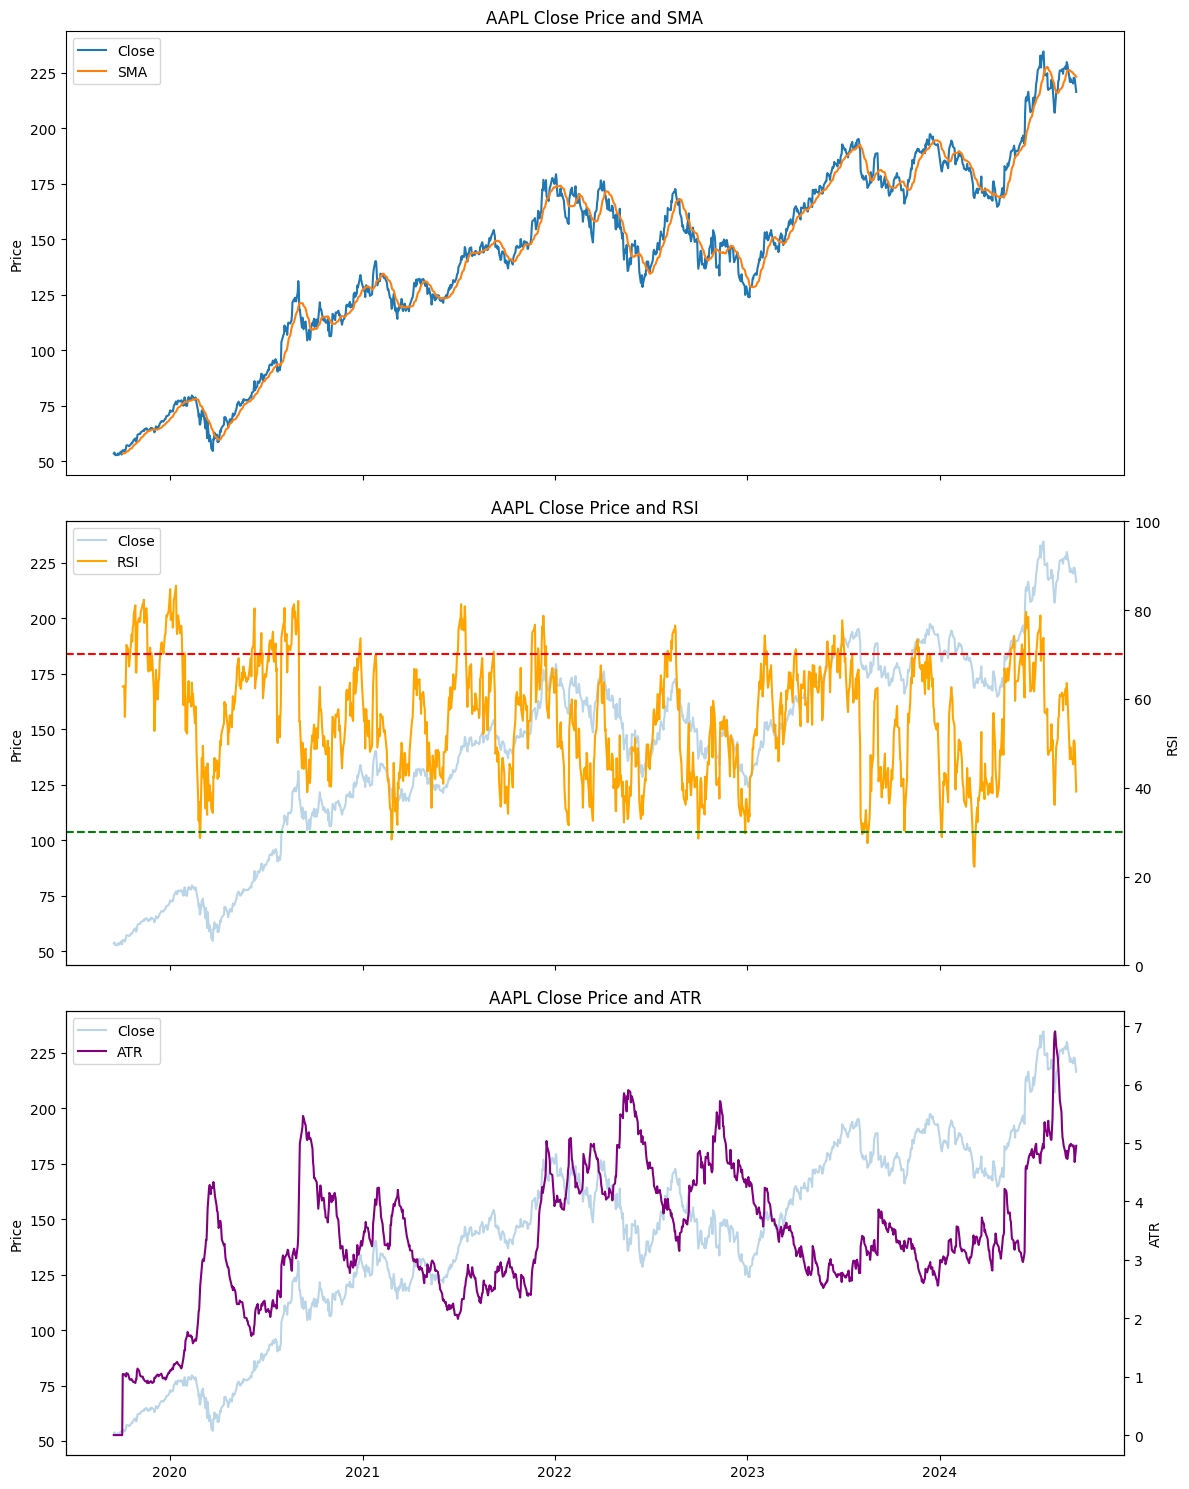

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_financial_indicators(data):
    # Convert Date to datetime if it's not already
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Create the figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
    
    # Plot Close price and SMA on the first subplot
    ax1.plot(data['Date'], data['Close'], label='Close')
    ax1.plot(data['Date'], data['SMA'], label='SMA')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.set_title('AAPL Close Price and SMA')
    
    # Plot RSI on the second subplot
    ax2.plot(data['Date'], data['Close'], label='Close', alpha=0.3)
    ax2.set_ylabel('Price')
    ax2_twin = ax2.twinx()
    ax2_twin.plot(data['Date'], data['RSI'], color='orange', label='RSI')
    ax2_twin.set_ylabel('RSI')
    ax2_twin.set_ylim(0, 100)
    ax2_twin.axhline(y=70, color='r', linestyle='--')  # Overbought line
    ax2_twin.axhline(y=30, color='g', linestyle='--')  # Oversold line
    ax2.set_title('AAPL Close Price and RSI')
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines2_twin, labels2_twin = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines2 + lines2_twin, labels2 + labels2_twin, loc='upper left')
    
    # Plot ATR on the third subplot
    ax3.plot(data['Date'], data['Close'], label='Close', alpha=0.3)
    ax3.set_ylabel('Price')
    ax3_twin = ax3.twinx()
    ax3_twin.plot(data['Date'], data['ATR'], color='purple', label='ATR')
    ax3_twin.set_ylabel('ATR')
    ax3.set_title('AAPL Close Price and ATR')
    lines3, labels3 = ax3.get_legend_handles_labels()
    lines3_twin, labels3_twin = ax3_twin.get_legend_handles_labels()
    ax3.legend(lines3 + lines3_twin, labels3 + labels3_twin, loc='upper left')
    
    # Format the date on the x-axis
    # ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.xticks(rotation=45)
    
    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

# To use the function:
plot_financial_indicators(ta_data)